In [82]:
# Configuração e importações
import pandas as pd
import numpy as np
from pathlib import Path

pd.set_option('display.float_format', lambda v: f"{v:,.4f}")
BASE_DIR = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
DATA_PATH = BASE_DIR / 'coronarias.xls'  # ajuste se necessário



In [83]:
# Carregar dados e normalizar valores faltantes '.'
# engine='xlrd' pode ser necessário em alguns ambientes; deixamos automático
xls_path = DATA_PATH
assert xls_path.exists(), f"Arquivo não encontrado: {xls_path}"

# Ler a planilha específica 'dados'
df_raw = pd.read_excel(xls_path, sheet_name='dados')

# Normalização robusta de faltantes: '.', strings vazias e variações com espaços
def normalize_missing(val):
    if isinstance(val, str):
        v = val.strip()
        if v == '' or v == '.':
            return np.nan
    return val

df = df_raw.applymap(normalize_missing)
print(df.shape)
df.head()


(1500, 70)


,IDENT,HA,COL,HDL,LDL,VLDL,TRIG,DIAB,GLIC,AH,TABAG,TABAG4,IDADE_M,ALTURA,PESO,IMC,ASS,ANGEST,ANGINS,IMP,ICC,IMA,ARRIT,ARTER,CAT,CD,DA,DI,CX,NUMAL,PLAQ,TE,FIB,IDADE1,SEXO,M_PA,M_C,PSR,PDR,IDA55,SEID,LO3,OBESO,IDREAL,SELO,AH2,AH3,C/H,L/H,IDA60,SEID6,IDADFEM,IDADMAS,COLM,COLS,HDLM,HDLS,LDLM,LDLS,VLDLM,VLDLS,TRIGM,TRIGS,GLICM,GLICS,INFARTO,C/H-M,C/H-S,L/H-M,L/H-S
0,1,1.0000,202.0000,NaN,NaN,NaN,171.0000,0.0000,99.0000,1,0.0000,0.0000,43.0000,"1,54","88,00","37,11",NaN,0,1,0,1,0,0,0.0000,1,0,0,0,0,0,NaN,NaN,NaN,55,0,0,0,16.0000,9.0000,1,0,0,1.0000,43.0000,0,1,1,NaN,NaN,0,1,55,0,0.0000,202.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,171.0000,0.0000,99.0000,0,NaN,NaN,NaN,NaN
1,2,0.0000,225.0000,49.0000,142.0000,NaN,167.0000,1.0000,317.0000,0,1.0000,3.0000,NaN,"1,63","73,00","27,48",NaN,0,1,0,0,0,0,0.0000,1,0,0,0,0,0,NaN,NaN,NaN,53,1,0,0,11.0000,8.0000,0,3,0,0.0000,NaN,2,0,0,5.0000,3.0000,0,3,0,53,0.0000,225.0000,0.0000,49.0000,0.0000,142.0000,NaN,NaN,0.0000,167.0000,317.0000,0.0000,0,0.0000,5.0000,0.0000,3.0000
2,3,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0000,1.0000,NaN,"1,70","67,00","23,18",NaN,0,1,0,0,0,0,0.0000,1,0,1,0,3,1,NaN,1.0000,NaN,66,1,0,0,16.0000,9.0000,1,2,1,0.0000,NaN,3,1,2,NaN,NaN,1,2,0,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,4,0.0000,213.0000,31.0000,168.0000,14.0000,136.0000,0.0000,75.0000,0,NaN,NaN,NaN,"1,69","62,00","21,71",NaN,0,1,0,0,0,0,0.0000,1,0,0,0,0,0,NaN,NaN,NaN,28,1,0,0,12.0000,8.0000,0,3,0,0.0000,NaN,2,0,0,7.0000,5.0000,0,3,0,28,0.0000,213.0000,0.0000,31.0000,0.0000,168.0000,0.0000,14.0000,0.0000,136.0000,0.0000,75.0000,0,0.0000,7.0000,0.0000,5.0000
4,5,0.0000,258.0000,40.0000,200.0000,18.0000,92.0000,0.0000,78.0000,2,0.0000,0.0000,NaN,"1,60","67,00","26,17",NaN,0,0,1,0,0,0,0.0000,1,3,4,0,2,3,NaN,1.0000,NaN,64,1,1,0,14.0000,9.0000,1,2,1,0.0000,NaN,3,1,2,6.0000,5.0000,1,2,0,64,0.0000,258.0000,0.0000,40.0000,0.0000,200.0000,0.0000,18.0000,0.0000,92.0000,0.0000,78.0000,1,0.0000,6.0000,0.0000,5.0000


In [84]:
# Seleção das variáveis solicitadas
# Categóricas: SEXO, AH3, INFARTO, HA, DIAB, ARTER, ARRIT, TABAG4, OBESO
# Quantitativas: IDADE1, ALTURA, PESO, IMC, COL, TRIG, PSR, PDR

categoricas = ['SEXO','AH3','INFARTO','HA','DIAB','ARTER','ARRIT','TABAG4','OBESO']
quantitativas = ['IDADE1','ALTURA','PESO','IMC','COL','TRIG','PSR','PDR']

# Filtrar apenas colunas existentes (nome pode variar no arquivo)
cols_existentes = [c for c in categoricas + quantitativas if c in df.columns]
missing_cols = sorted(set(categoricas + quantitativas) - set(cols_existentes))
print('Colunas não encontradas (verificar nomes):', missing_cols)

df_sel = df[cols_existentes].copy()

# Substituir explicitamente '.' e strings vazias por NaN nas colunas selecionadas
df_sel = df_sel.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() in {'.', ''} else x)

# Conversão robusta para numérico (suporta vírgula decimal e espaços)
def to_numeric_locale(series: pd.Series) -> pd.Series:
    if series.dtype.kind in 'biufc':
        return series.astype(float)
    s = series.astype(str).str.strip()
    # tratar '.' isolado já virou NaN acima; aqui focamos em números
    s = s.str.replace(',', '.', regex=False)
    s = s.str.replace(r'[^0-9\.-]', '', regex=True)
    return pd.to_numeric(s, errors='coerce')

for c in quantitativas:
    if c in df_sel.columns:
        df_sel[c] = to_numeric_locale(df_sel[c])

print(df_sel.head())
print(df_sel.tail())



Colunas não encontradas (verificar nomes): []
   SEXO  AH3  INFARTO     HA   DIAB  ARTER  ARRIT  TABAG4  OBESO  IDADE1  \
0     0    1        0 1.0000 0.0000 0.0000      0  0.0000 1.0000 55.0000   
1     1    0        0 0.0000 1.0000 0.0000      0  3.0000 0.0000 53.0000   
2     1    2        0 1.0000    NaN 0.0000      0  1.0000 0.0000 66.0000   
3     1    0        0 0.0000 0.0000 0.0000      0     NaN 0.0000 28.0000   
4     1    2        1 0.0000 0.0000 0.0000      0  0.0000 0.0000 64.0000   

   ALTURA    PESO     IMC      COL     TRIG     PSR    PDR  
0  1.5400 88.0000 37.1100 202.0000 171.0000 16.0000 9.0000  
1  1.6300 73.0000 27.4800 225.0000 167.0000 11.0000 8.0000  
2  1.7000 67.0000 23.1800      NaN      NaN 16.0000 9.0000  
3  1.6900 62.0000 21.7100 213.0000 136.0000 12.0000 8.0000  
4  1.6000 67.0000 26.1700 258.0000  92.0000 14.0000 9.0000  
      SEXO  AH3  INFARTO     HA   DIAB  ARTER  ARRIT  TABAG4  OBESO  IDADE1  \
1495     1    2        0 0.0000 0.0000 1.0000      0

In [85]:
# Funções auxiliares para sumarização
from scipy import stats

def resumo_quantitativas(dfq: pd.DataFrame) -> pd.DataFrame:
    estat = {}
    for c in dfq.columns:
        s = dfq[c].dropna()
        if s.empty:
            estat[c] = {
                'n': len(dfq[c]), 'n_na': dfq[c].isna().sum(), 'perc_na': dfq[c].isna().mean()*100,
                'media': np.nan, 'mediana': np.nan, 'desvio': np.nan,
                'q1': np.nan, 'q3': np.nan, 'p5': np.nan, 'p95': np.nan,
                'min': np.nan, 'max': np.nan,
            }
            continue
        estat[c] = {
            'n': len(dfq[c]), 'n_na': dfq[c].isna().sum(), 'perc_na': dfq[c].isna().mean()*100,
            'media': s.mean(), 'mediana': s.median(), 'desvio': s.std(ddof=1),
            'q1': s.quantile(0.25), 'q3': s.quantile(0.75), 'p5': s.quantile(0.05), 'p95': s.quantile(0.95),
            'min': s.min(), 'max': s.max(),
        }
    return pd.DataFrame(estat).T


def resumo_categoricas(dfc: pd.DataFrame) -> dict:
    tabelas = {}
    for c in dfc.columns:
        cont = dfc[c].value_counts(dropna=False).rename('freq')
        perc = (cont / cont.sum() * 100).rename('perc')
        tabelas[c] = pd.concat([cont, perc], axis=1)
    return tabelas


In [86]:
# Cenário A: Remover linhas com faltantes nas variáveis selecionadas
cols = cols_existentes
cenario_a = df_sel.dropna(subset=cols)

resumo_q_a = resumo_quantitativas(cenario_a[[c for c in quantitativas if c in cenario_a.columns]])
resumo_c_a = resumo_categoricas(cenario_a[[c for c in categoricas if c in cenario_a.columns]])

print('Cenário A (drop linhas) - quantitativas:')
resumo_q_a


Cenário A (drop linhas) - quantitativas:


,n,n_na,perc_na,media,mediana,desvio,q1,q3,p5,p95,min,max
IDADE1,973.0000,0.0000,0.0000,58.3083,59.0000,10.6201,51.0000,66.0000,40.0000,74.0000,22.0000,87.0000
ALTURA,973.0000,0.0000,0.0000,1.6613,1.6700,0.0850,1.6000,1.7200,1.5200,1.8000,1.3800,1.9000
PESO,973.0000,0.0000,0.0000,73.6341,72.0000,13.0884,64.0000,81.0000,54.0000,96.0000,40.0000,136.0000
IMC,973.0000,0.0000,0.0000,26.6239,26.2000,3.9806,24.0200,28.7200,20.9720,33.5300,16.0000,42.9200
COL,973.0000,0.0000,0.0000,217.5519,214.0000,50.0431,183.0000,244.0000,147.0000,300.0000,74.0000,620.0000
TRIG,973.0000,0.0000,0.0000,176.5889,154.0000,101.3305,110.0000,217.0000,70.0000,345.4000,28.0000,999.0000
PSR,973.0000,0.0000,0.0000,14.0904,14.0000,2.3027,12.0000,16.0000,11.0000,18.0000,9.0000,23.0000
PDR,973.0000,0.0000,0.0000,8.5098,8.0000,1.1694,8.0000,9.0000,7.0000,11.0000,5.0000,14.0000


In [87]:
# Cenário B: Imputar média nas quantitativas; manter categóricas como estão (sem imputação)
cenario_b = df_sel.copy()
for c in quantitativas:
    if c in cenario_b.columns:
        cenario_b[c] = pd.to_numeric(cenario_b[c], errors='coerce')
        media_c = cenario_b[c].mean(skipna=True)
        cenario_b[c] = cenario_b[c].fillna(media_c)

resumo_q_b = resumo_quantitativas(cenario_b[[c for c in quantitativas if c in cenario_b.columns]])
resumo_c_b = resumo_categoricas(cenario_b[[c for c in categoricas if c in cenario_b.columns]])

print('Cenário B (imputação por média) - quantitativas:')
resumo_q_b


Cenário B (imputação por média) - quantitativas:


,n,n_na,perc_na,media,mediana,desvio,q1,q3,p5,p95,min,max
IDADE1,"1,500.0000",0.0000,0.0000,58.0080,59.0000,10.8624,51.0000,66.0000,39.0000,74.0000,11.0000,87.0000
ALTURA,"1,500.0000",0.0000,0.0000,1.6598,1.6600,0.0860,1.6000,1.7200,1.5100,1.8000,1.3800,1.9500
PESO,"1,500.0000",0.0000,0.0000,73.5511,73.0000,12.9281,65.0000,81.0000,54.0000,96.0000,40.0000,136.0000
IMC,"1,500.0000",0.0000,0.0000,26.6197,26.4600,3.8726,24.0300,28.7000,20.9790,33.4700,16.0000,42.9200
COL,"1,500.0000",0.0000,0.0000,217.6752,217.6752,45.8339,192.0000,237.0000,150.0000,294.0000,74.0000,620.0000
TRIG,"1,500.0000",0.0000,0.0000,175.5070,175.5070,89.2251,121.0000,197.0000,75.0000,325.0000,28.0000,999.0000
PSR,"1,500.0000",0.0000,0.0000,14.0623,14.0000,2.2569,12.0000,16.0000,11.0000,18.0000,8.0000,23.0000
PDR,"1,500.0000",0.0000,0.0000,8.5164,8.0000,1.1805,8.0000,9.0000,7.0000,10.0000,4.0000,14.0000


In [88]:
# Comparação lado a lado das quantitativas entre os cenários
comparacao_q = resumo_q_a.join(resumo_q_b, lsuffix='_drop', rsuffix='_media')
comparacao_q


,n_drop,n_na_drop,perc_na_drop,media_drop,mediana_drop,desvio_drop,q1_drop,q3_drop,p5_drop,p95_drop,min_drop,max_drop,n_media,n_na_media,perc_na_media,media_media,mediana_media,desvio_media,q1_media,q3_media,p5_media,p95_media,min_media,max_media
IDADE1,973.0000,0.0000,0.0000,58.3083,59.0000,10.6201,51.0000,66.0000,40.0000,74.0000,22.0000,87.0000,"1,500.0000",0.0000,0.0000,58.0080,59.0000,10.8624,51.0000,66.0000,39.0000,74.0000,11.0000,87.0000
ALTURA,973.0000,0.0000,0.0000,1.6613,1.6700,0.0850,1.6000,1.7200,1.5200,1.8000,1.3800,1.9000,"1,500.0000",0.0000,0.0000,1.6598,1.6600,0.0860,1.6000,1.7200,1.5100,1.8000,1.3800,1.9500
PESO,973.0000,0.0000,0.0000,73.6341,72.0000,13.0884,64.0000,81.0000,54.0000,96.0000,40.0000,136.0000,"1,500.0000",0.0000,0.0000,73.5511,73.0000,12.9281,65.0000,81.0000,54.0000,96.0000,40.0000,136.0000
IMC,973.0000,0.0000,0.0000,26.6239,26.2000,3.9806,24.0200,28.7200,20.9720,33.5300,16.0000,42.9200,"1,500.0000",0.0000,0.0000,26.6197,26.4600,3.8726,24.0300,28.7000,20.9790,33.4700,16.0000,42.9200
COL,973.0000,0.0000,0.0000,217.5519,214.0000,50.0431,183.0000,244.0000,147.0000,300.0000,74.0000,620.0000,"1,500.0000",0.0000,0.0000,217.6752,217.6752,45.8339,192.0000,237.0000,150.0000,294.0000,74.0000,620.0000
TRIG,973.0000,0.0000,0.0000,176.5889,154.0000,101.3305,110.0000,217.0000,70.0000,345.4000,28.0000,999.0000,"1,500.0000",0.0000,0.0000,175.5070,175.5070,89.2251,121.0000,197.0000,75.0000,325.0000,28.0000,999.0000
PSR,973.0000,0.0000,0.0000,14.0904,14.0000,2.3027,12.0000,16.0000,11.0000,18.0000,9.0000,23.0000,"1,500.0000",0.0000,0.0000,14.0623,14.0000,2.2569,12.0000,16.0000,11.0000,18.0000,8.0000,23.0000
PDR,973.0000,0.0000,0.0000,8.5098,8.0000,1.1694,8.0000,9.0000,7.0000,11.0000,5.0000,14.0000,"1,500.0000",0.0000,0.0000,8.5164,8.0000,1.1805,8.0000,9.0000,7.0000,10.0000,4.0000,14.0000


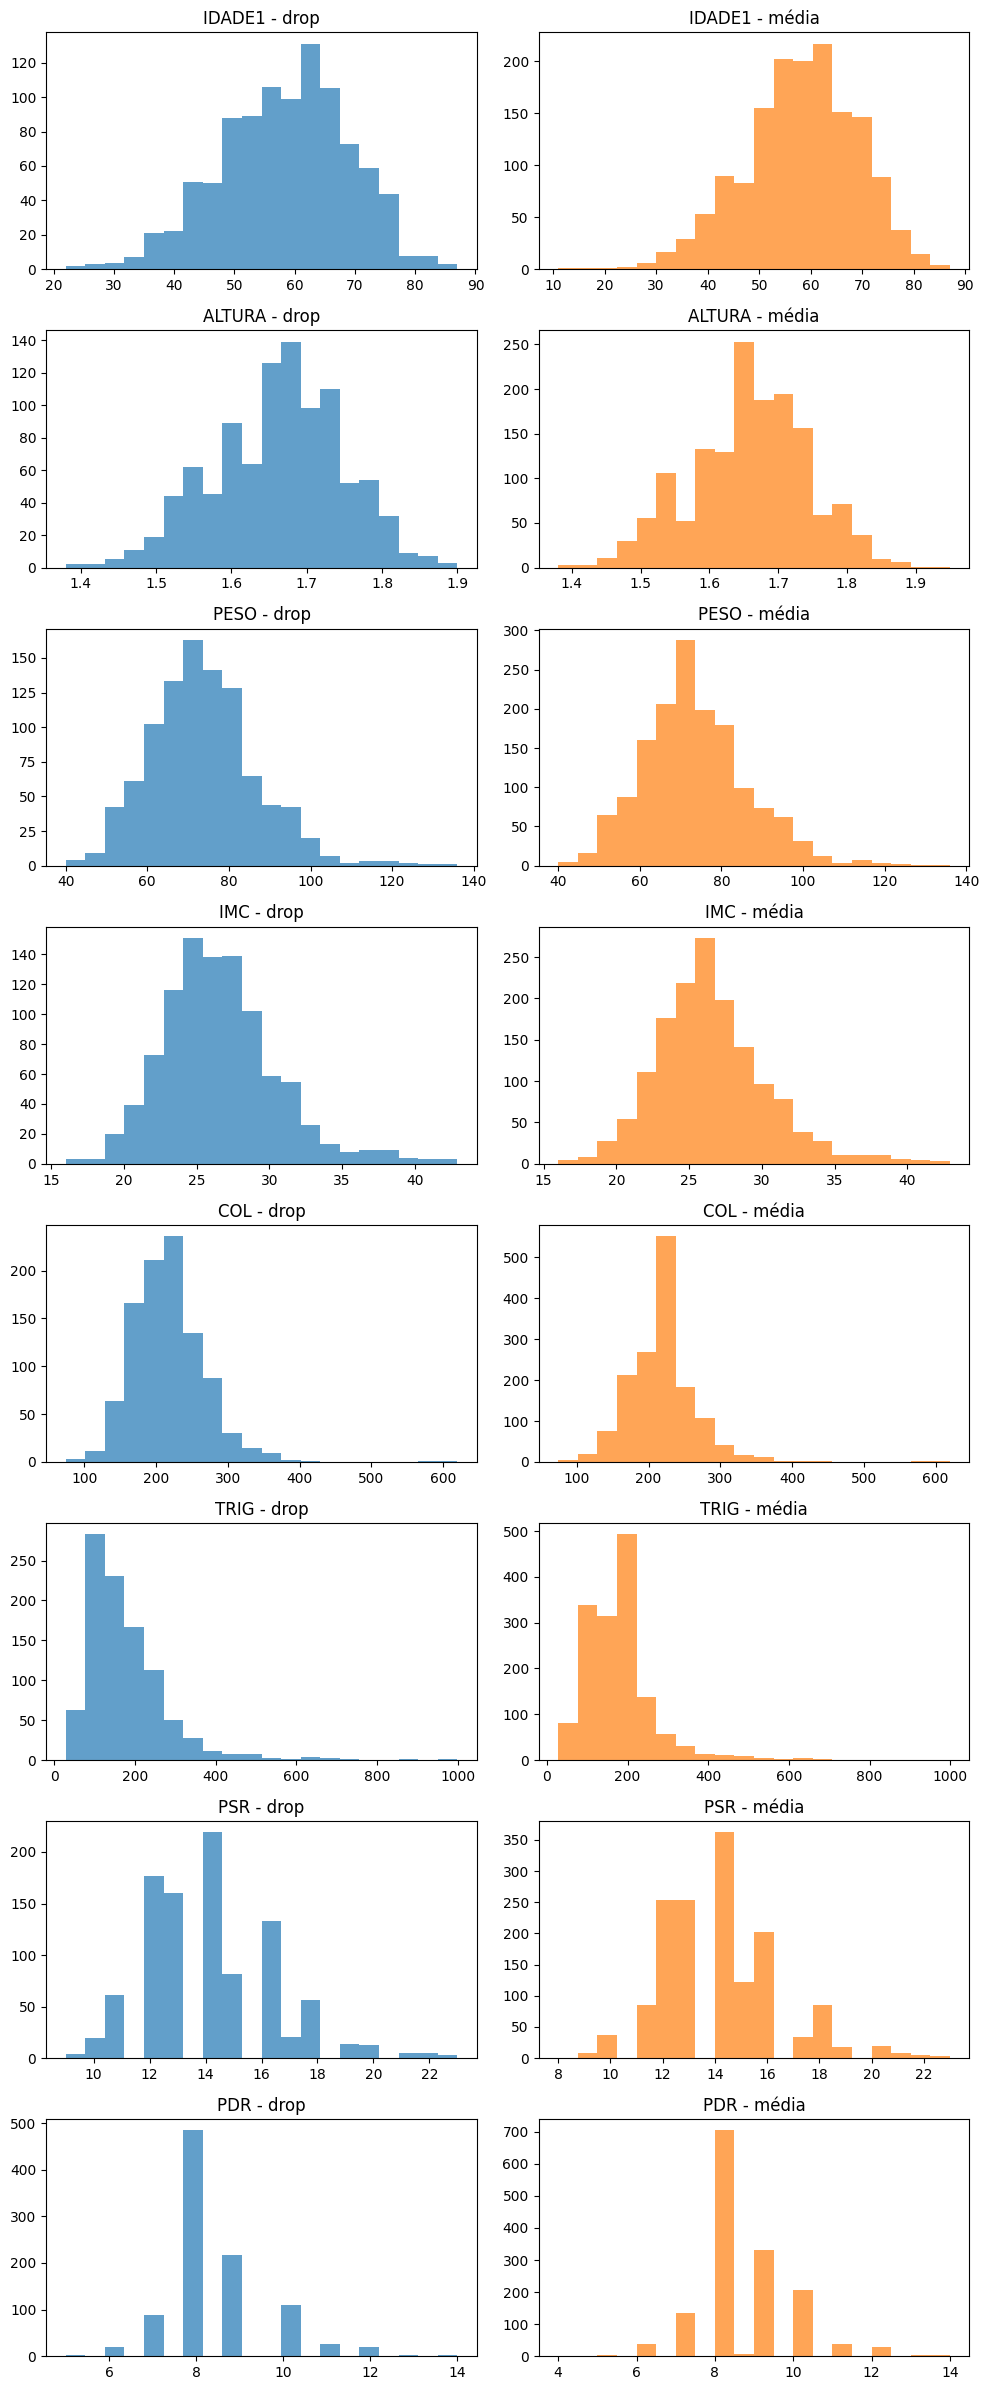

In [89]:
# Visualização rápida do impacto nas distribuições (opcional)
import matplotlib.pyplot as plt

cols_plot = [c for c in quantitativas if c in df_sel.columns]

fig, axes = plt.subplots(len(cols_plot), 2, figsize=(10, 3*len(cols_plot)))
for i, c in enumerate(cols_plot):
    axes[i,0].hist(cenario_a[c].dropna(), bins=20, color='tab:blue', alpha=0.7)
    axes[i,0].set_title(f"{c} - drop")
    axes[i,1].hist(cenario_b[c].dropna(), bins=20, color='tab:orange', alpha=0.7)
    axes[i,1].set_title(f"{c} - média")
plt.tight_layout()
plt.show()


### Como decidir entre remover linhas e imputar pela média
- Se a porcentagem de faltantes (`perc_na`) em uma variável quantitativa for alta, a imputação pela média tende a distorcer a variância e achataria a distribuição. Prefira remoção se a amostra continuar adequada.
- Se for baixa (ex.: < 5%-10%) e você precisa de mais linhas para modelos, imputar média pode ser aceitável, observando a mudança em `desvio`, `q1/q3` e `p5/p95`.
- Para variáveis categóricas acima, não imputamos; avalie se faz sentido criar uma categoria 'Desconhecido' dependendo do uso.
- Use a tabela `comparacao_q` para ver como `media`, `mediana`, `desvio` e separatrizes mudam em cada variável.



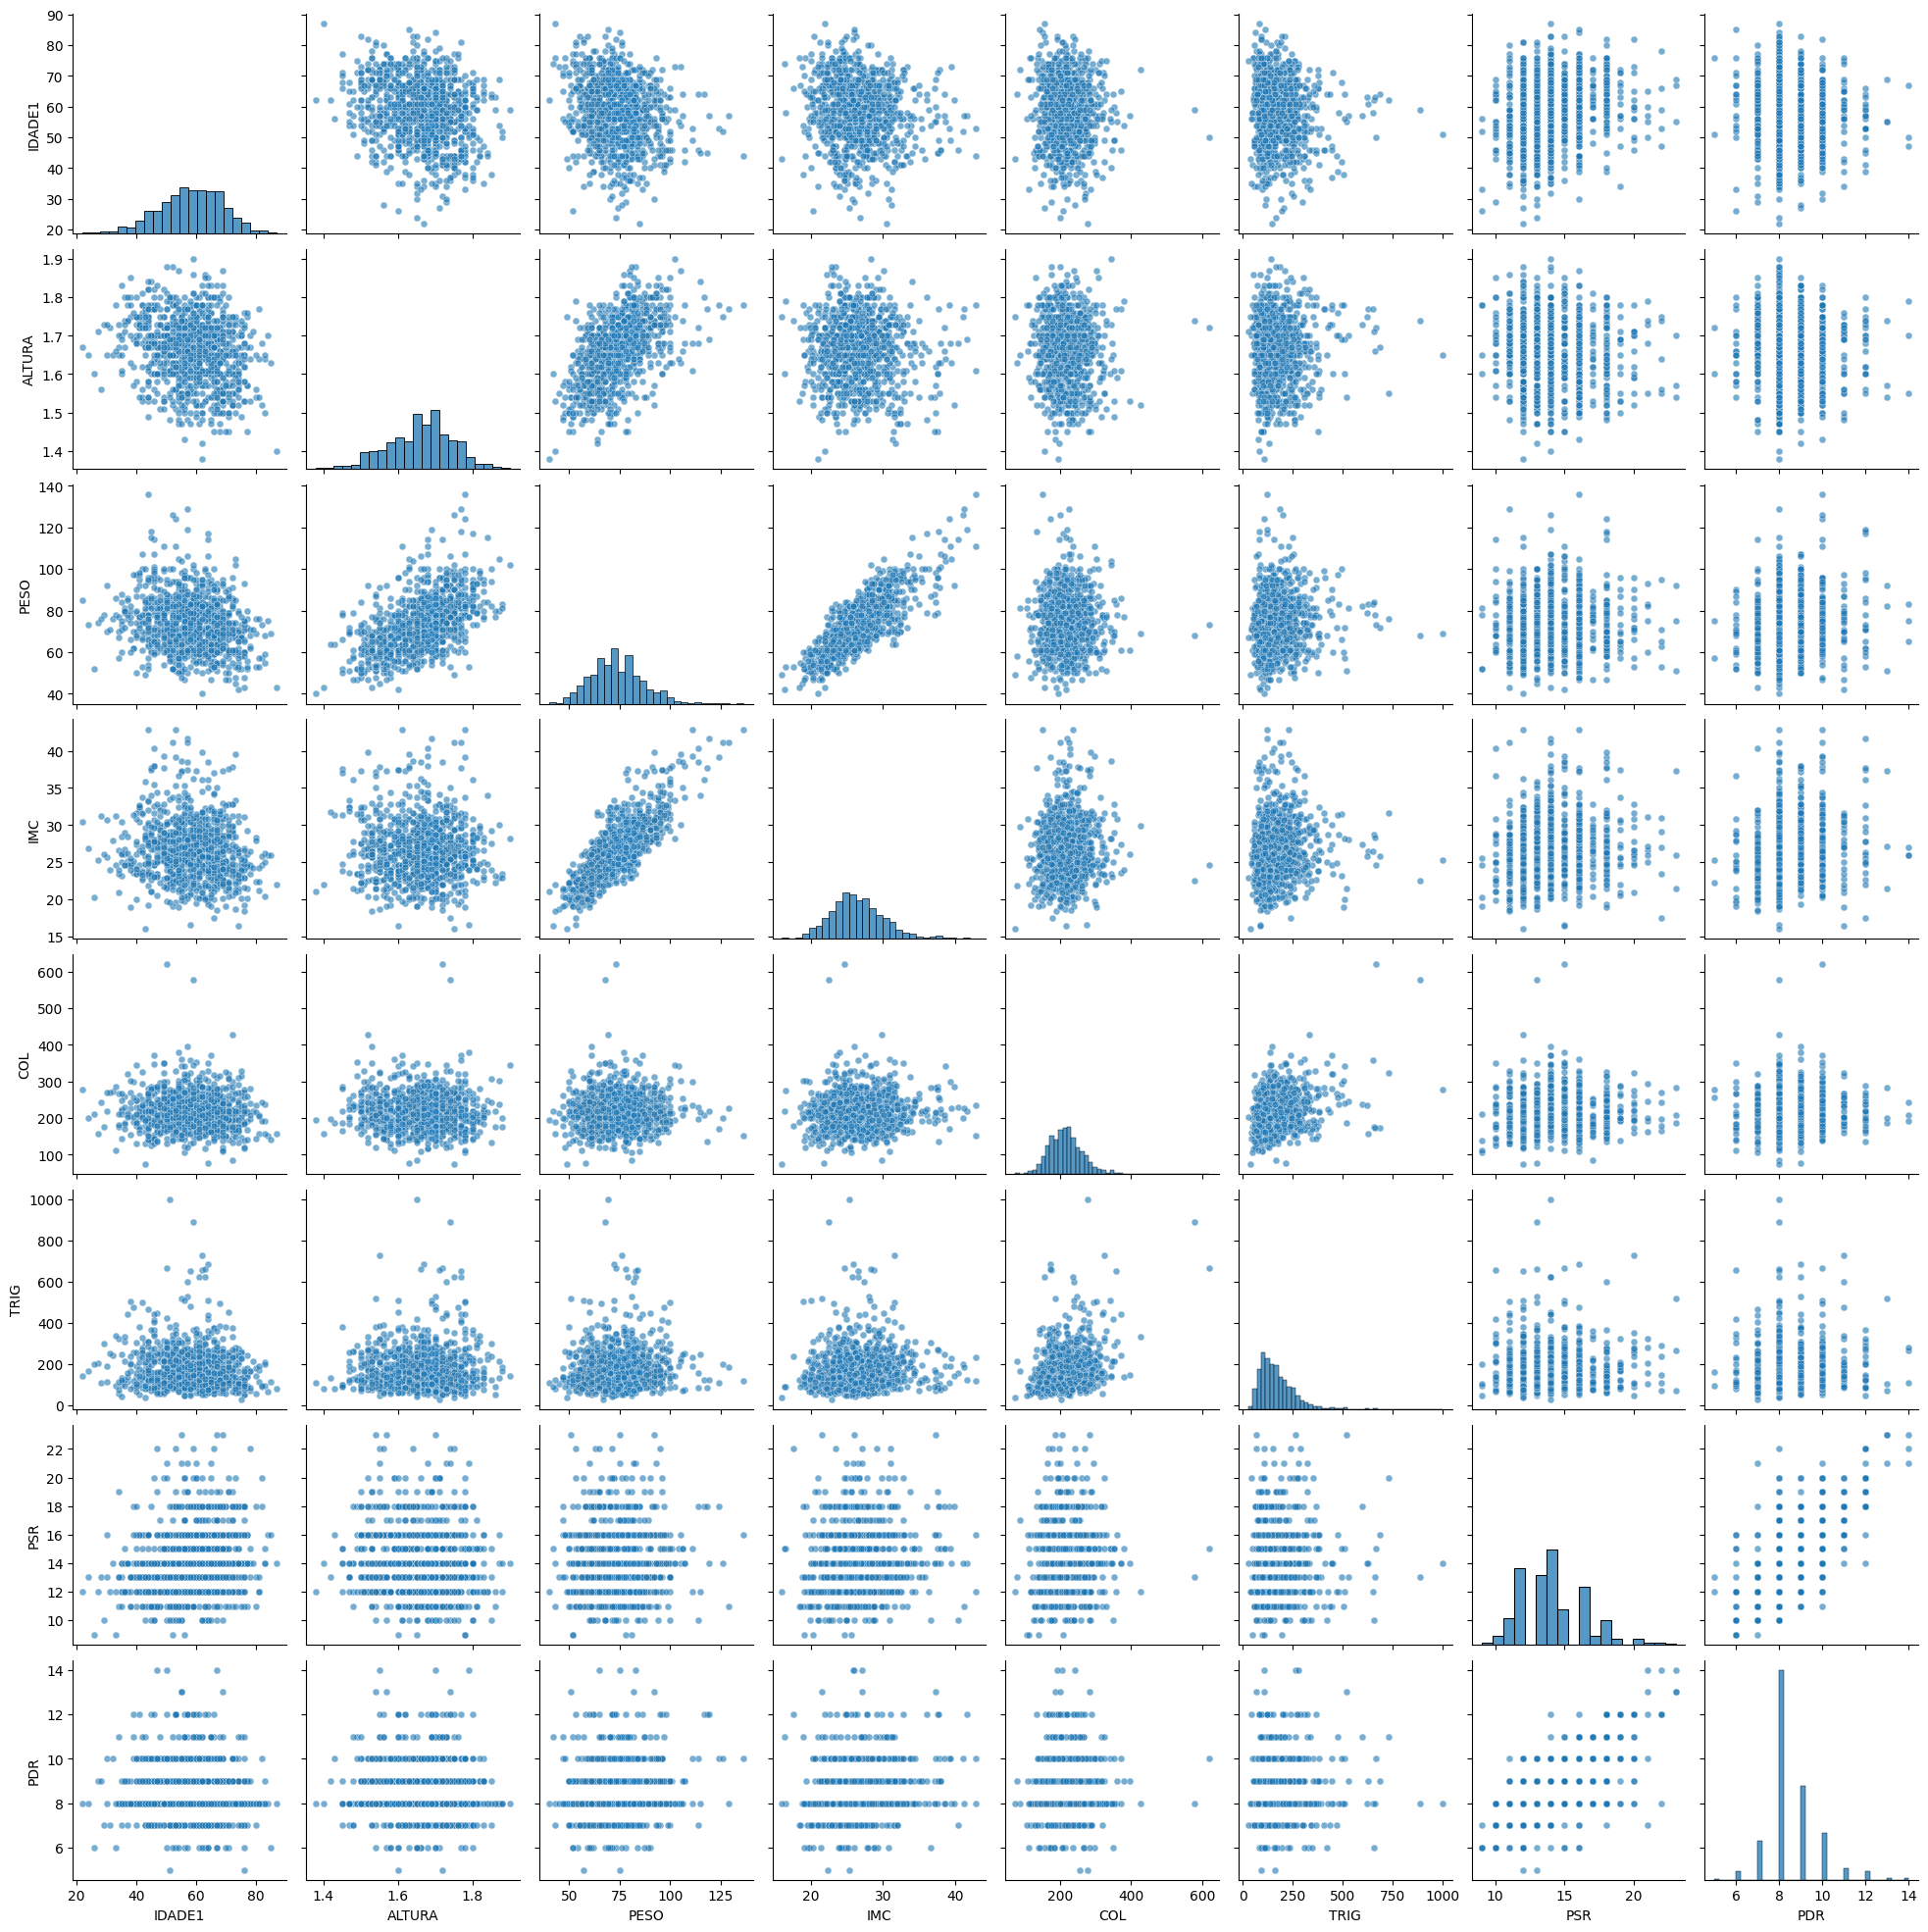

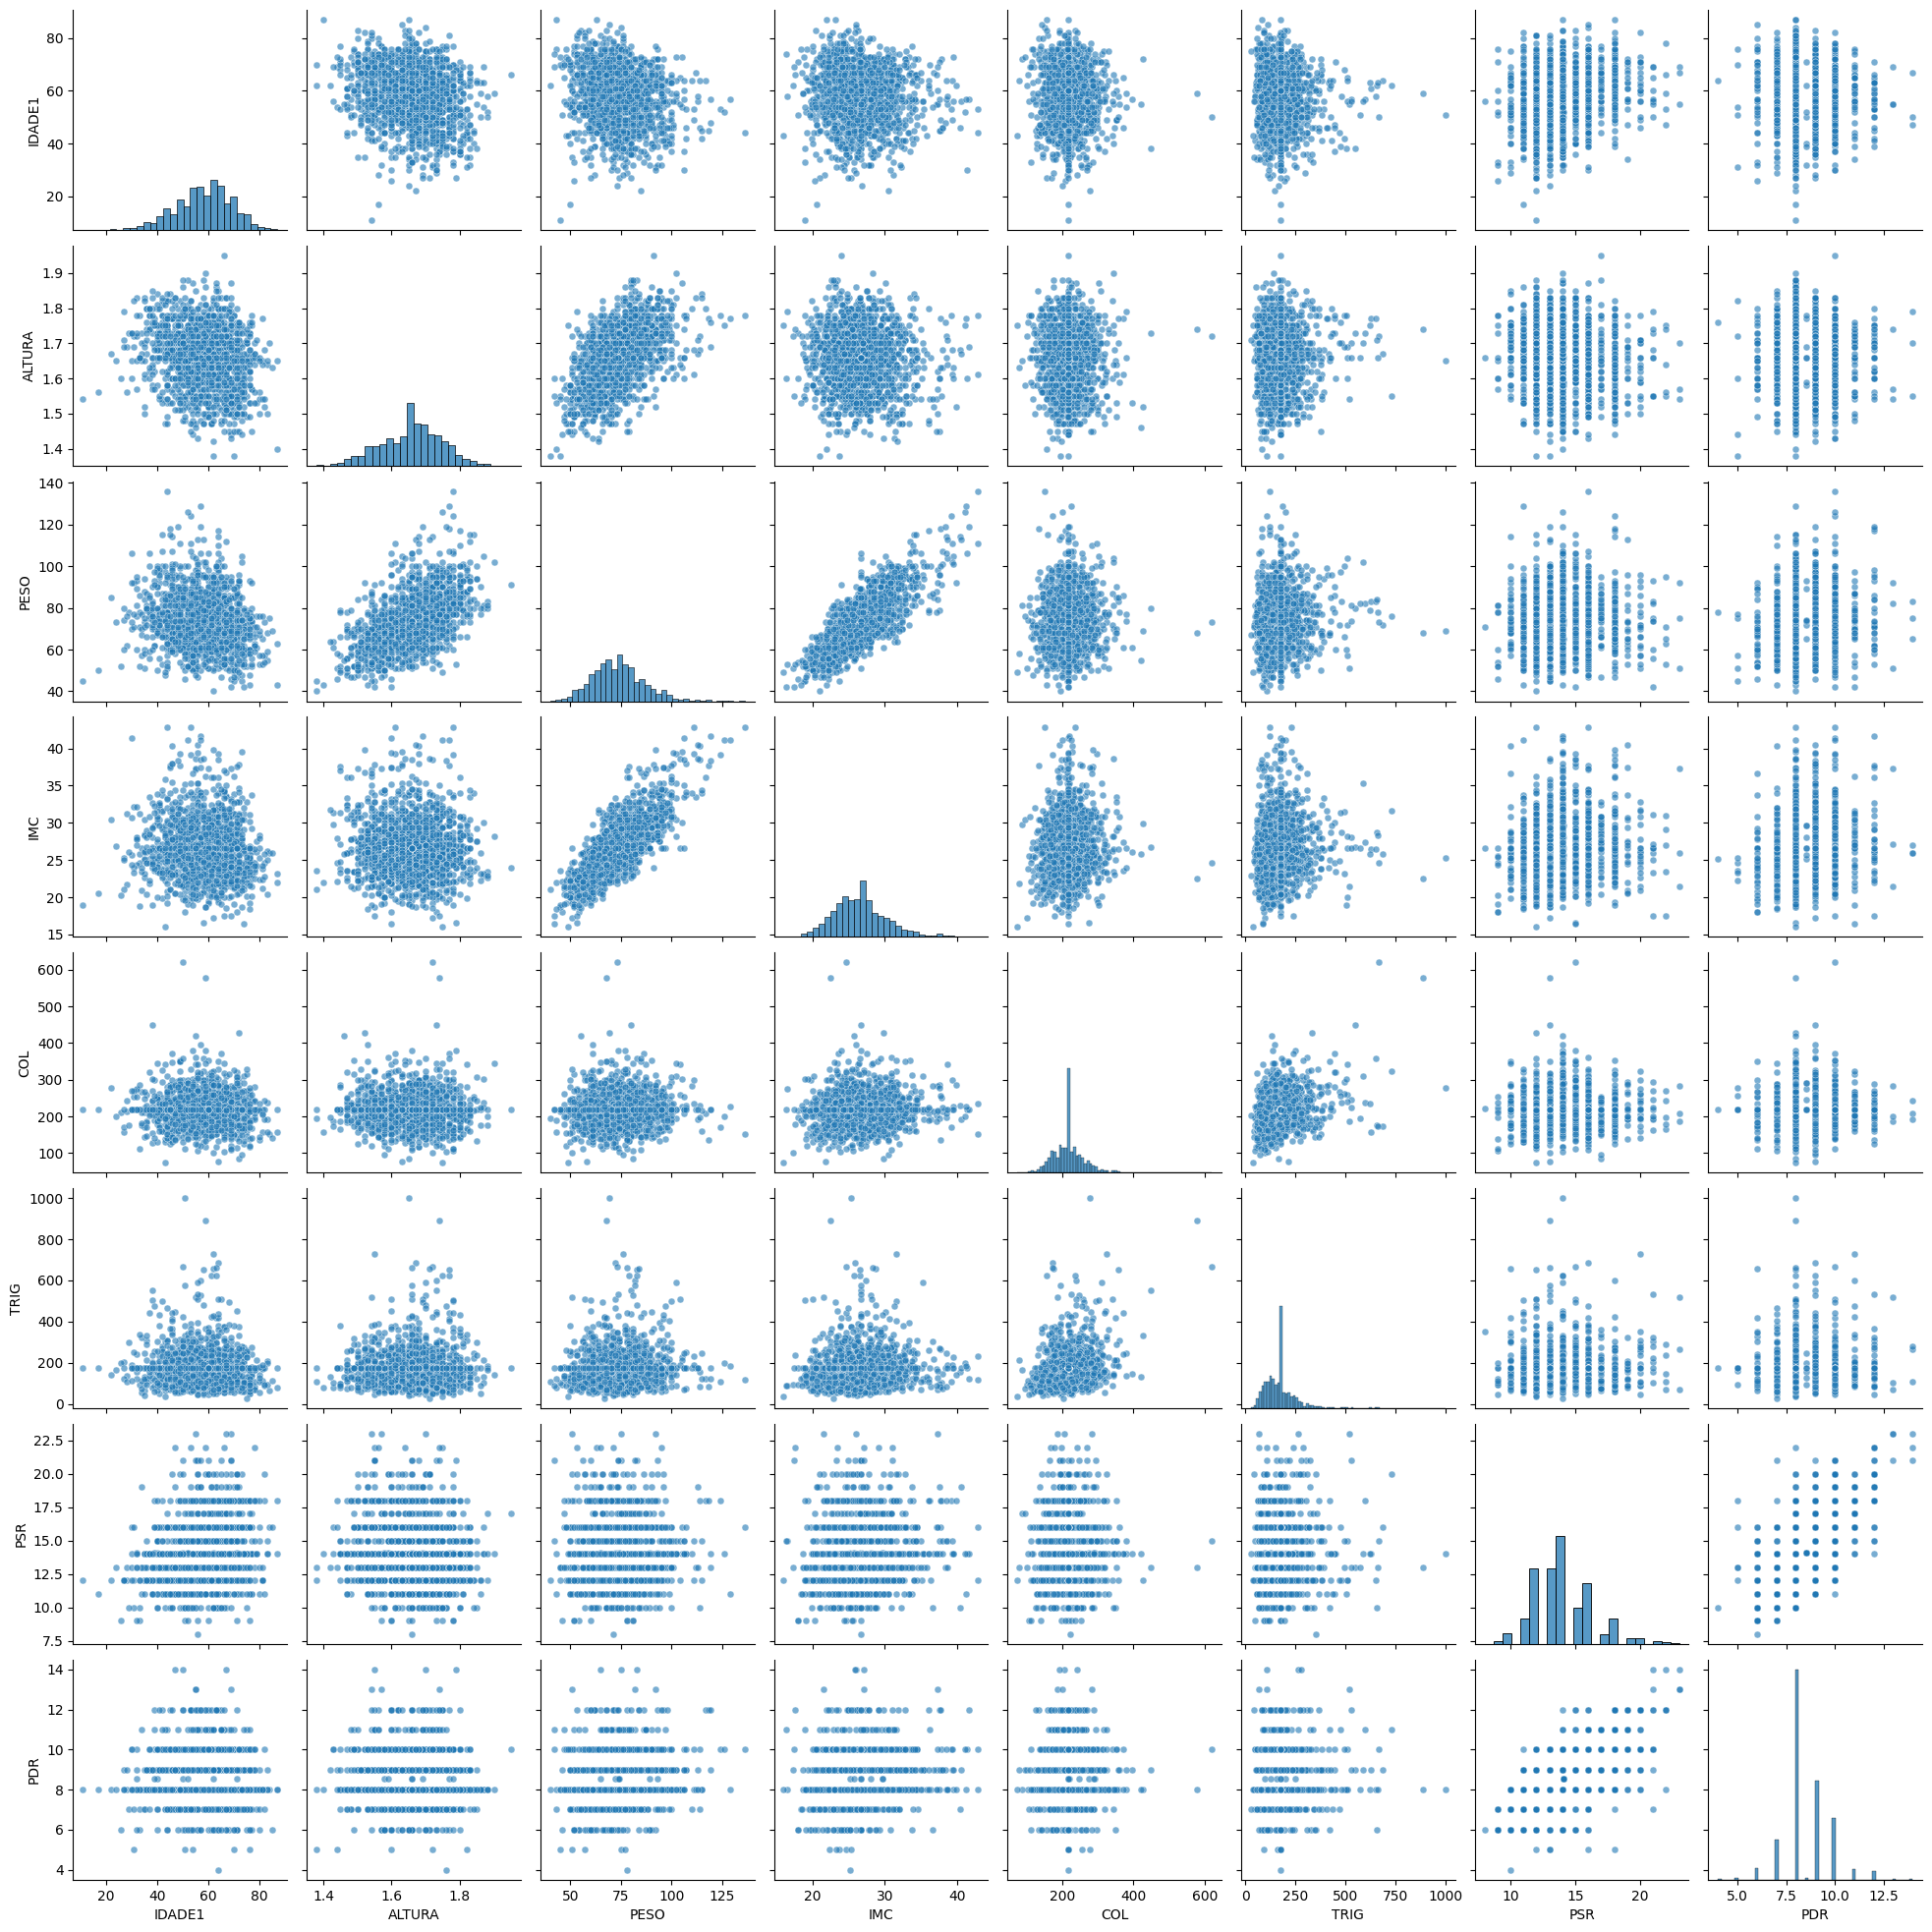

In [90]:
# Gráficos de dispersão (pairplot) para ambos os cenários
import seaborn as sns

num_cols = [c for c in quantitativas if c in df_sel.columns]

# Cenário A - pairplot
if len(num_cols) >= 2:
    sns.pairplot(cenario_a[num_cols], diag_kind='hist', plot_kws={'alpha':0.6, 's':25})
else:
    print('Poucas colunas quantitativas disponíveis para pairplot no Cenário A.')

# Cenário B - pairplot
if len(num_cols) >= 2:
    sns.pairplot(cenario_b[num_cols], diag_kind='hist', plot_kws={'alpha':0.6, 's':25})
else:
    print('Poucas colunas quantitativas disponíveis para pairplot no Cenário B.')


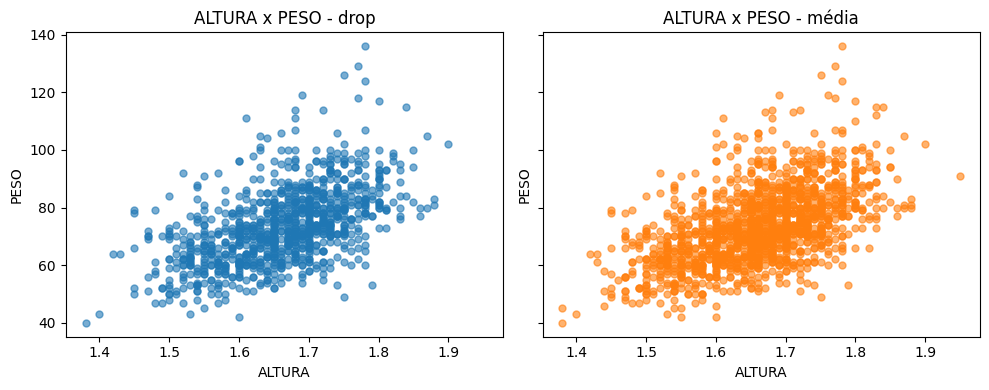

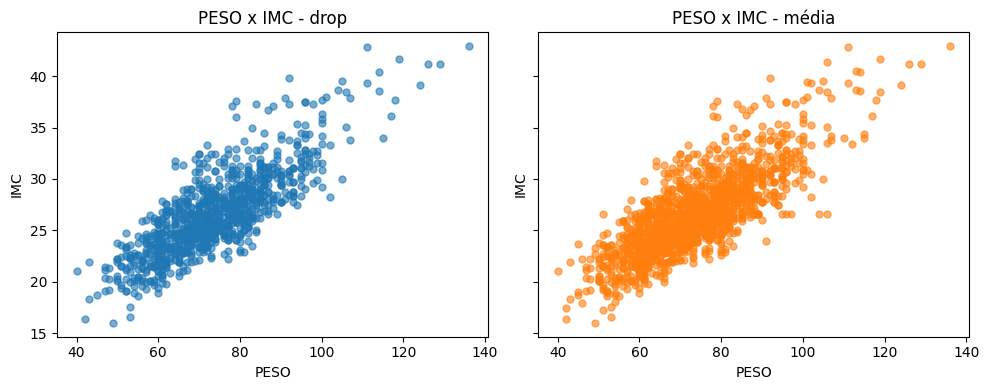

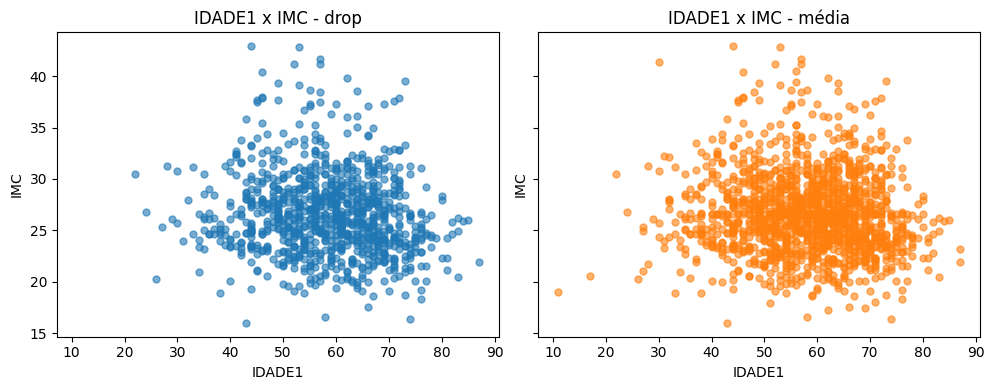

In [91]:
# Dispersão para pares específicos
import matplotlib.pyplot as plt

def scatter_duplo(x_col: str, y_col: str):
    fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
    axes[0].scatter(cenario_a[x_col], cenario_a[y_col], alpha=0.6, s=25)
    axes[0].set_title(f"{x_col} x {y_col} - drop")
    axes[0].set_xlabel(x_col); axes[0].set_ylabel(y_col)
    axes[1].scatter(cenario_b[x_col], cenario_b[y_col], alpha=0.6, s=25, color='tab:orange')
    axes[1].set_title(f"{x_col} x {y_col} - média")
    axes[1].set_xlabel(x_col); axes[1].set_ylabel(y_col)
    plt.tight_layout()
    plt.show()

pares = [
    ('ALTURA','PESO'),
    ('PESO','IMC'),
    ('IDADE1','IMC'),
]
for x,y in pares:
    if x in num_cols and y in num_cols:
        scatter_duplo(x,y)
    else:
        print(f'Par ignorado por ausência de coluna: {x}, {y}')


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [93]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


try:
    # Carrega o arquivo Excel
    df = pd.read_excel('coronarias.xls', sheet_name='dados')
    print("✅ Arquivo carregado com sucesso!")
    print(f"📊 Dimensões do dataset: {df.shape}")
except Exception as e:
    print(f"❌ Erro ao carregar o arquivo: {e}")
    

✅ Arquivo carregado com sucesso!
📊 Dimensões do dataset: (1500, 70)


In [94]:
# Contar o número de registros preenchidos com o caractere "." em cada coluna
num_pontos_por_coluna = (df == '.').sum()
print("Número de registros preenchidos com '.' por coluna:")
filtro = num_pontos_por_coluna[num_pontos_por_coluna < 500]
print(filtro.sort_values(ascending=False))
print(filtro.sum())

Número de registros preenchidos com '.' por coluna:
C/H-S      482
C/H        482
C/H-M      482
HDL        478
HDLM       478
HDLS       478
GLICS      306
GLICM      306
TRIGS      291
TRIGM      291
TRIG       291
COLM       253
COL        253
COLS       253
GLIC       231
TABAG4     130
TABAG      130
DIAB       111
ALTURA      78
OBESO       78
IMC         78
HA          52
PESO        41
ARTER       19
PSR          7
PDR          7
INFARTO      0
IDADMAS      0
IDADFEM      0
SEID6        0
IDA60        0
AH3          0
AH2          0
SELO         0
IDENT        0
LO3          0
SEID         0
AH           0
ANGEST       0
ANGINS       0
IMP          0
ICC          0
IMA          0
ARRIT        0
CAT          0
CD           0
DA           0
DI           0
CX           0
NUMAL        0
IDADE1       0
M_PA         0
M_C          0
IDA55        0
SEXO         0
dtype: int64
6086
